# The below Python Code is the Utility to generate the Image Gallery for the following.

# 1.BackGround Images(Scenes)

# 2.ForeGround Images

# 3.Masks

# 4.ForeGround-BackGround Images

# 5.ForeGround-BackGround Masks

#6.Depth Model Images

In [0]:

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/'My Drive'/MASK1

batch1_images.zip


# Unzip the Images

In [0]:
!unzip /content/drive/'My Drive'/MASK1/batch1_images.zip  -d /content/drive/'My Drive'/MASK1/batch_images

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/MASK1/batch_images/mask_black_jpg/bg_mask_29_78_0_20.jpg  
  inflating: /content/drive/My Drive/MASK1/batch_images/mask_black_jpg/bg_mask_29_78_0_3.jpg  
  inflating: /content/drive/My Drive/MASK1/batch_images/mask_black_jpg/bg_mask_29_78_0_4.jpg  
  inflating: /content/drive/My Drive/MASK1/batch_images/mask_black_jpg/bg_mask_29_78_0_5.jpg  
  inflating: /content/drive/My Drive/MASK1/batch_images/mask_black_jpg/bg_mask_29_78_0_6.jpg  
  inflating: /content/drive/My Drive/MASK1/batch_images/mask_black_jpg/bg_mask_29_78_0_7.jpg  
  inflating: /content/drive/My Drive/MASK1/batch_images/mask_black_jpg/bg_mask_29_78_0_8.jpg  
  inflating: /content/drive/My Drive/MASK1/batch_images/mask_black_jpg/bg_mask_29_78_0_9.jpg  
  inflating: /content/drive/My Drive/MASK1/batch_images/mask_black_jpg/bg_mask_29_78_1_1.jpg  
  inflating: /content/drive/My Drive/MASK1/batch_images/mask_black_jpg/bg_mask_29_78_1_10.jpg

In [0]:
!ls /content/drive/'My Drive'/MASK1/batch_images/fg_jpg

fg_img_21.jpg  fg_img_23.jpg  fg_img_25.jpg  fg_img_27.jpg  fg_img_29.jpg
fg_img_22.jpg  fg_img_24.jpg  fg_img_26.jpg  fg_img_28.jpg  fg_img_30.jpg


In [0]:
from tqdm import tqdm
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2

## Store the image file Names

In [0]:
def get_img_file_names(path):
  img_file_names =[]
  for root, dirs, files in os.walk(path):
    for filename in files:
      #if img_file is not None:
      img_file_names.append(path + '/' + filename)  
  return img_file_names





In [0]:
import matplotlib.pyplot as plt

## Show Images Horizontally

In [0]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesHorizontally(list_of_files,w,h):
    fig = figure(figsize=(w,h))
    #fig = plt.figure(figsize=(8,8))
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(list_of_files[i])
        imshow(image,cmap='Greys_r')
        axis('off')

## Get the image file names for BackGround,ForeGround,Mask,ForeGround-BackGround,ForeGround-BackGround Mask,Depth Model Output images

In [0]:
fg_file_names = get_img_file_names("/content/drive/My Drive/MASK1/batch_images/fg_jpg")

In [0]:
depth_fg_bg_file_names = get_img_file_names("/content/drive/My Drive/MASK1/batch_images/depth_fg_bg_jpg")

In [0]:
fg_bg_file_names = get_img_file_names("/content/drive/My Drive/MASK1/batch_images/fg_bg_jpg")

In [0]:
mask_black_file_names = get_img_file_names("/content/drive/My Drive/MASK1/batch_images/mask_black_jpg")

In [0]:
mask_file_names = get_img_file_names("/content/drive/My Drive/MASK1/batch_images/mask_jpg")

In [0]:
bg_file_names = get_img_file_names("/content/drive/My Drive/MASK1/batch_images/bg_jpg")

In [0]:
idx =[0,1,2,4000,4001,4002,8000,8001,8002,12000,12001,12002]

## Display Scene or BackGround Images

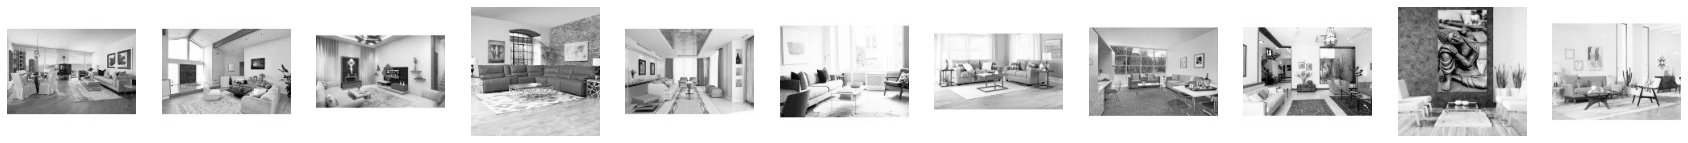

In [0]:
showImagesHorizontally(bg_file_names[0:11],30,8)

## Display ForeGround Images

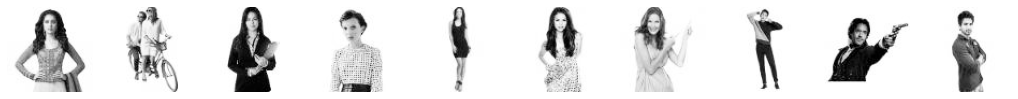

In [0]:
showImagesHorizontally(fg_file_names,18,8)

## Display Masked Images

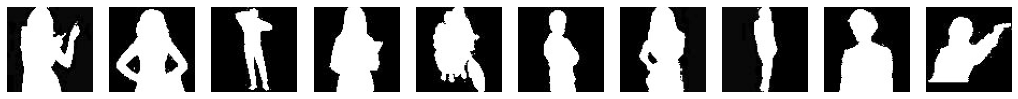

In [0]:
showImagesHorizontally(mask_file_names[0:20],18,8)

## Display ForeGround-Background Images

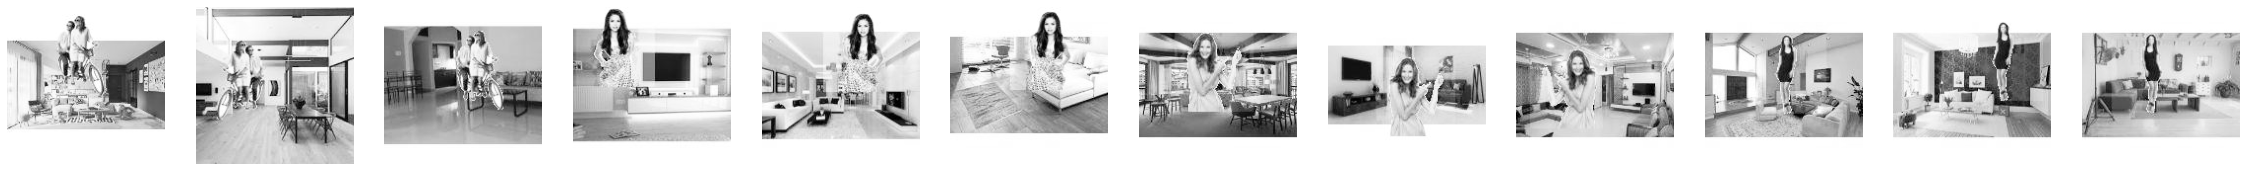

In [0]:
idx =[0,1,2,4000,4001,4002,8000,8001,8002,12000,12001,12002]
res_fg_bg = [fg_bg_file_names[i] for i in idx] 
showImagesHorizontally(res_fg_bg,40,8)

## Display Foreground-Background Masks

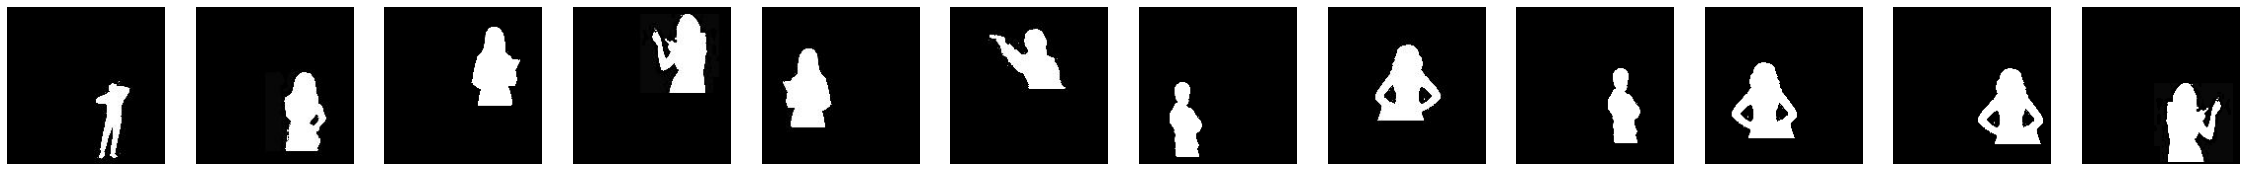

In [0]:
res_mask_black = [mask_black_file_names[i] for i in idx] 
showImagesHorizontally(res_mask_black,40,8)

## Display Output of the Depth Model

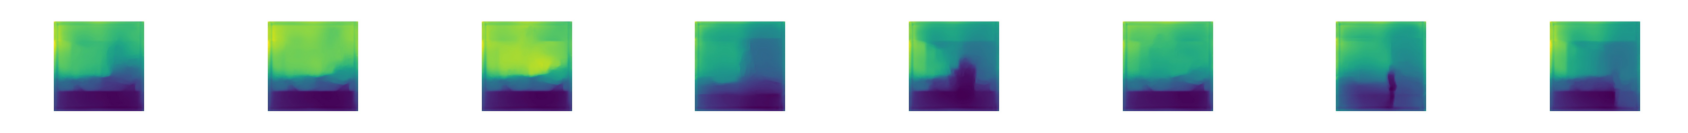

In [0]:
res_depth_fg_bg = [depth_fg_bg_file_names[i] for i in idx]
mod_idx =[0,1,2,5,7,8,9,10]
mod_res_depth_fg_bg = [res_depth_fg_bg[i] for i in mod_idx]

showImagesHorizontally(mod_res_depth_fg_bg,30,8)